In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.ticker as ticker
import json
from datetime import timedelta

Datasources:

https://www.blockchain.com/explorer/charts/total-bitcoins

https://www-statista-com.ezproxy.lib.utexas.edu/statistics/647374/worldwide-blockchain-wallet-users/?locale=en

https://www.blockchain.com/explorer/charts/api

https://www.blockchain.com/explorer/charts/n-transactions

https://web.archive.org/web/20220602190929/https://www.blockchain.com/charts/my-wallet-n-users


https://tylermoore.utulsa.edu/jme17.pdf : Price manupilation paper (Why we didn't include 2013-2015 in our regression)
https://www.investopedia.com/news/bots-drove-bitcoins-150to1000-rise-2013-paper/

In [2]:
with open('total-bitcoins.json') as file:
    btc_load=json.loads(file.read())['total-bitcoins']

In [3]:
dates,btc_circ=[],[]
for i in btc_load:
    dates.append(i['x'])
    btc_circ.append(i['y'])

In [4]:
btc_circ=pd.DataFrame(dates,btc_circ).reset_index()
btc_circ.columns=['btc_circ','ts']

In [5]:
btc_circ['date']=btc_circ['ts'].apply(lambda x:datetime.fromtimestamp(int(str(x)[:-3])))
btc_circ['disp_date']=btc_circ['date'].apply(lambda x:x.strftime('%b %Y'))

In [6]:
btc_circ_copy=btc_circ.copy()
btc_circ=btc_circ[btc_circ['date']<'2017-11-01']

In [7]:
avg_value=btc_circ.resample('M',on='date').mean().reset_index()

Text(0.5, 0, 'Date')

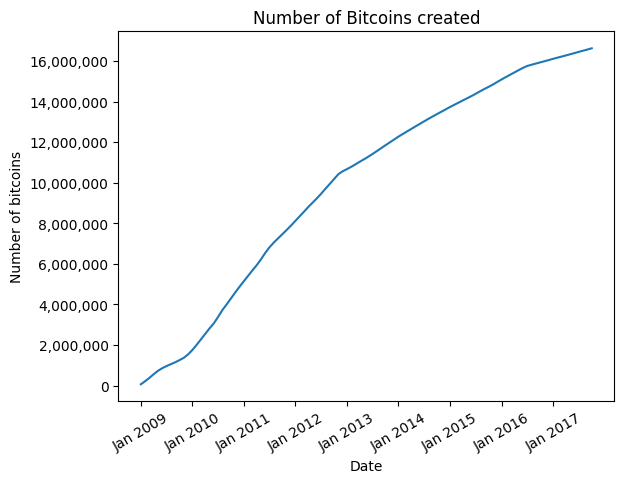

In [8]:
fig, ax=plt.subplots()
avg_value['display_date']=avg_value['date'].apply(lambda x:x.strftime('%b %Y'))
ax.plot(avg_value['display_date'],avg_value['btc_circ'])
x_ticks=plt.xticks(avg_value['display_date'][::12],rotation=30)
plt.yticks(np.arange(0, 18_000_000, 2_000_000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(lambda x, p: format(int(x), ','))
plt.title('Number of Bitcoins created')
plt.ylabel('Number of bitcoins')
plt.xlabel('Date')

In [9]:
avg_value=avg_value[avg_value['date']>='2011-12-07'].reset_index()

In [10]:
blck_wallets=pd.read_csv("blockchain_wallets.csv")

In [11]:
blck_wallets['date']=pd.to_datetime(blck_wallets['date'])
blck_wallets['display_date']=blck_wallets['date'].apply(lambda x:x.strftime('%b %Y'))

In [12]:
blck_wallets=blck_wallets[blck_wallets['date']<'2018-01-01']
blck_wallets['number_of_wallets']=blck_wallets['number_of_wallets'].astype(float)

Text(0.5, 0, 'Date')

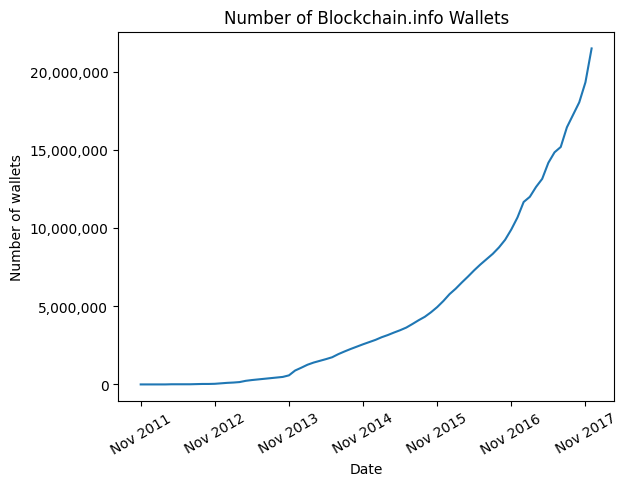

In [13]:
fig, ax=plt.subplots()
ax.plot(blck_wallets['display_date'],blck_wallets['number_of_wallets'])
x_ticks=plt.xticks(blck_wallets['display_date'][::12],rotation=30)
plt.yticks(np.arange(0, 23_000_000, 5_000_000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(lambda x, p: format(int(x), ','))
plt.title('Number of Blockchain.info Wallets')
plt.ylabel('Number of wallets')
plt.xlabel('Date')

In [14]:
blck_wallets_weekly=pd.read_csv('blockchain_wallets_weekly.csv')
blck_wallets_weekly['date']=pd.to_datetime(blck_wallets_weekly['Timestamp'])
blck_wallets_weekly_copy=blck_wallets_weekly.copy()

In [15]:
blck_wallets_weekly['pct_change']=(blck_wallets_weekly['my-wallet-n-users']-blck_wallets_weekly['my-wallet-n-users'].shift(1))/blck_wallets_weekly['my-wallet-n-users'].shift(1)

Text(0.5, 1.0, 'Biweekly growth in wallets ')

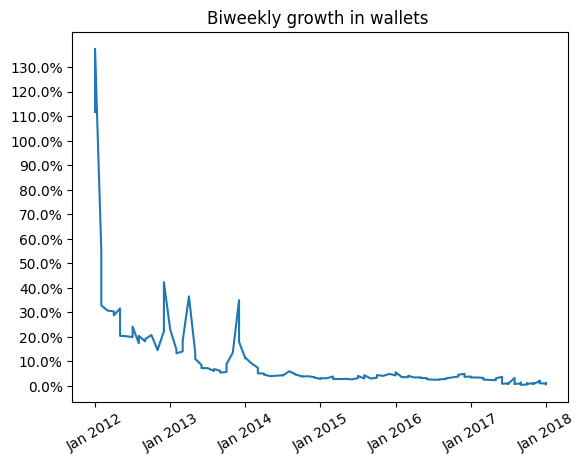

In [16]:
blck_wallets_weekly=blck_wallets_weekly[(blck_wallets_weekly['date']>='2012-01-01') & (blck_wallets_weekly['date']<='2018-02-01')][['date','pct_change','my-wallet-n-users']]
blck_wallets_weekly['display_date']=blck_wallets_weekly['date'].apply(lambda x:x.strftime('%b %Y'))

fig, ax=plt.subplots()
ax.plot(blck_wallets_weekly['display_date'],blck_wallets_weekly['pct_change']*100)
x_ticks=plt.xticks(['Jan 2012','Jan 2013','Jan 2014','Jan 2015','Jan 2016','Jan 2017','Jan 2018'],rotation=30)
y_ticks=plt.yticks(np.arange(0, 140, 10))
ax.yaxis.set_major_formatter(lambda x, p: str(float(x))+'%')
plt.title('Biweekly growth in wallets ')

In [20]:
blck_wallets_weekly['pct_change'].mean()

0.08711356124324826

In [21]:
with open('bitcoin_prices.json') as file:
    btc_prcies_json=json.loads(file.read())['market-price']

In [22]:
dates,prices=[],[]
for i in btc_prcies_json:
    dates.append(i['x'])
    prices.append(i['y'])

In [23]:
btc_prices=pd.DataFrame(dates,prices).reset_index()

In [24]:
btc_prices.columns=['prices','ts']
btc_prices['ts']=btc_prices['ts'].apply(lambda x:datetime.fromtimestamp(int(str(x)[:-3])))

In [25]:
def nearest(items, pivot):
    pivot=datetime.strptime(pivot,'%Y-%m-%d')
    return pd.to_datetime(min([i for i in items if i <= pivot], key=lambda x: abs(x - pivot)))

In [29]:
btc_dates=['2011-12-27','2012-02-26','2012-04-27','2012-06-27','2012-08-27','2012-10-27','2012-12-27','2015-04-30',
'2015-06-30','2015-08-30','2015-10-30','2015-12-30','2016-02-29','2016-04-30','2016-06-30','2016-08-30',
'2016-10-30','2016-12-30','2017-03-01','2017-05-01','2017-07-01','2017-08-31','2017-10-31','2017-12-31']
wallets=[]
num_bitcoins=[]
bitcoin_prices=[]

for i in btc_dates:
    bitcoin_prices.append(btc_prices[btc_prices.ts == nearest(btc_prices.ts.to_list(),i)].iloc[0,0])
    wallets.append(blck_wallets_weekly_copy[blck_wallets_weekly_copy.date==nearest(blck_wallets_weekly_copy.date.to_list(),i)].iloc[0,1])
    num_bitcoins.append(btc_circ_copy[btc_circ_copy.date==nearest(btc_circ_copy.date.to_list(),i)].iloc[0,0])

In [30]:
final_dataset=pd.DataFrame([btc_dates,bitcoin_prices,wallets,num_bitcoins]).T

final_dataset.columns=['date','btc_price','number_wallets','number_bitcoins']
final_dataset['date']=pd.to_datetime(final_dataset['date'])
final_dataset['btc_log']=final_dataset['btc_price'].apply(lambda x: np.log(x))
final_dataset['transaction_pairs']=final_dataset['number_wallets'].apply(lambda x: (x*(x-1)/2)/1_000_000)
final_dataset['gompertz_sigmoid']=final_dataset['number_bitcoins'].apply(lambda x:(x*np.log(21_000_000/x))/1_000_000)
final_dataset['metcalfe_value']=np.log((final_dataset['number_wallets']*(final_dataset['number_wallets']-1)/2).astype(float))\
                                /final_dataset['gompertz_sigmoid']*0.94
final_dataset['btc_log_change']=(final_dataset['btc_log']-1*final_dataset['btc_log'].shift(1))
final_dataset['metcalfe_log_change']=(final_dataset['metcalfe_value']-final_dataset['metcalfe_value'].shift(1))

In [36]:
final_dataset.to_csv("paper_rep.csv")

In [31]:
df_reg=final_dataset[['date','btc_log_change','metcalfe_log_change','metcalfe_value']].dropna()

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


result = smf.ols(formula='btc_log_change ~ metcalfe_log_change',data=df_reg).fit()

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         btc_log_change   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.19e-09
Time:                        19:53:03   Log-Likelihood:                0.82955
No. Observations:                  23   AIC:                             2.341
Df Residuals:                      21   BIC:                             4.612
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0396    

Text(0, 0.5, 'Change in Bitcoin Price')

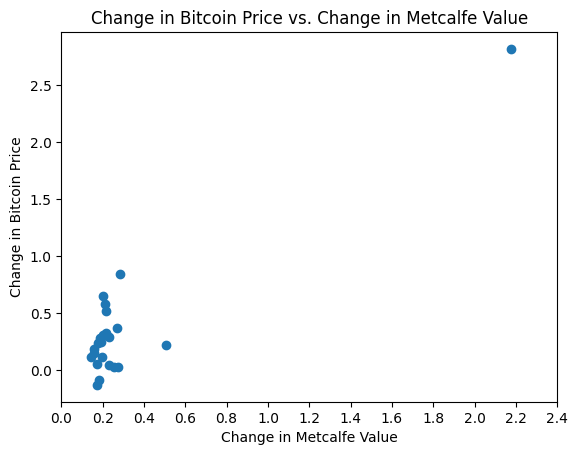

In [27]:
import seaborn as sns
plt.scatter(data=df_reg,x='metcalfe_log_change',y='btc_log_change')
txt=plt.xticks(np.arange(0, 2.5, 0.2))
plt.title('Change in Bitcoin Price vs. Change in Metcalfe Value')
plt.xlabel('Change in Metcalfe Value')
plt.ylabel('Change in Bitcoin Price')

In [28]:
def nearest(items, pivot):
    return pd.to_datetime(min([i for i in items if i <= pivot], key=lambda x: abs(x - pivot)))

plot_dates=blck_wallets_weekly.date.to_list()
wallets_2=[]
num_bitcoins_2=[]
bitcoin_prices_2=[]

for i in plot_dates:
    bitcoin_prices_2.append(btc_prices[btc_prices.ts == nearest(btc_prices.ts.to_list(),i)].iloc[0,0])
    wallets_2.append(blck_wallets_weekly_copy[blck_wallets_weekly_copy.date==nearest(blck_wallets_weekly_copy.date.to_list(),i)].iloc[0,1])
    num_bitcoins_2.append(btc_circ_copy[btc_circ_copy.date==nearest(btc_circ_copy.date.to_list(),i)].iloc[0,0])

In [29]:
val_price=pd.DataFrame([plot_dates,bitcoin_prices_2,wallets_2,num_bitcoins_2]).T

In [30]:
val_price.columns=['date','btc_price','number_wallets','number_bitcoins']
val_price['date']=pd.to_datetime(val_price['date'])
val_price['btc_log']=val_price['btc_price'].apply(lambda x: np.log(x))
val_price['transaction_pairs']=val_price['number_wallets'].apply(lambda x: (x*(x-1)/2)/1_000_000)
val_price['gompertz_sigmoid']=val_price['number_bitcoins'].apply(lambda x:(x*np.log(21_000_000/x))/1_000_000)
val_price['metcalfe_value']=np.log((val_price['number_wallets']*(val_price['number_wallets']-1)/2).astype(float))\
                                /val_price['gompertz_sigmoid']*0.94
val_price['btc_log_change']=(val_price['btc_log']-1*val_price['btc_log'].shift(1))
val_price['metcalfe_log_change']=(val_price['metcalfe_value']-val_price['metcalfe_value'].shift(1))

In [31]:
val_price=val_price[val_price['date']<='2018-02-28']

/tmp/ipykernel_25111/3064432742.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,100_000])


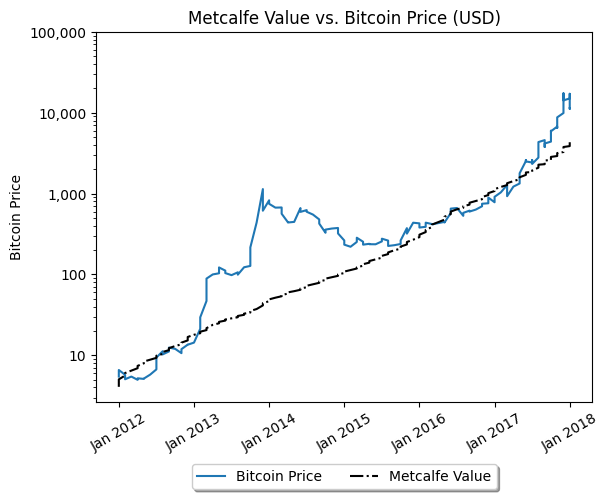

In [32]:
val_price['display_date']=val_price['date'].apply(lambda x:x.strftime('%b %Y'))
fig, ax = plt.subplots()


ax.plot(val_price['display_date'],np.exp(val_price['btc_log']),label='Bitcoin Price')
ax.plot(val_price['display_date'],np.exp(val_price['metcalfe_value']),color='black',linestyle='dashdot',label='Metcalfe Value')
ax.set_yscale('log')
ax.set_ylim([0,100_000])
ax.yaxis.set_major_formatter(lambda x, p: format(int(x), ','))
plt.title("Metcalfe Value vs. Bitcoin Price (USD)")
x_ticks=plt.xticks(['Jan 2012','Jan 2013','Jan 2014','Jan 2015','Jan 2016','Jan 2017','Jan 2018'],rotation=30)
plt.ylabel('Bitcoin Price')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

Text(0.5, 1.0, 'Price variation derived from metcalfe law')

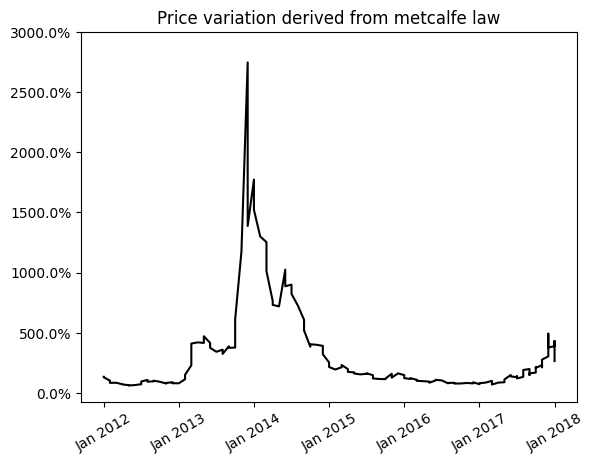

In [33]:
fig, ax = plt.subplots()
ax.plot(val_price['display_date'],np.exp(val_price['btc_log'])/
                                                   np.exp(val_price['metcalfe_value'])*100,color='black')

x_ticks=plt.xticks(['Jan 2012','Jan 2013','Jan 2014','Jan 2015','Jan 2016','Jan 2017','Jan 2018'],rotation=30)
y_ticks=plt.yticks(np.arange(0, 3200, 500))
ax.yaxis.set_major_formatter(lambda x, p: str(float(x))+'%')
plt.title('Price variation derived from metcalfe law')

In [34]:
with open('n-transactions.json') as file:
    n_trans=json.loads(file.read())['n-transactions']

In [35]:
ts,trans=[],[]
for i in n_trans:
    ts.append(i['x'])
    trans.append(i['y'])

In [36]:
trans=pd.DataFrame(ts,trans).reset_index()
trans.columns=['transactions','ts']
trans['date']=trans['ts'].apply(lambda x:datetime.fromtimestamp(int(str(x)[:-3])))

In [37]:
trans['date']=trans['date'].apply(lambda x: x-timedelta(hours=18))

In [38]:
res_dates=val_price.date.to_list()
metcalf_val=[]
transactions_lst=[]

for i in res_dates:
    metcalf_val.append(val_price[val_price.date==nearest(val_price.date.to_list(),i)].iloc[0,7])
    transactions_lst.append(trans[trans.date==nearest(trans.date.to_list(),i)].iloc[0,0])

In [39]:
trans_fnl=pd.DataFrame([res_dates,metcalf_val,transactions_lst]).T
trans_fnl.columns=['date','metcalfe_value','transactions']
trans_fnl['display_date']=trans_fnl['date'].apply(lambda x:x.strftime('%b %Y'))

Text(0.5, 1.0, 'Transactions as a % of Network Capacity')

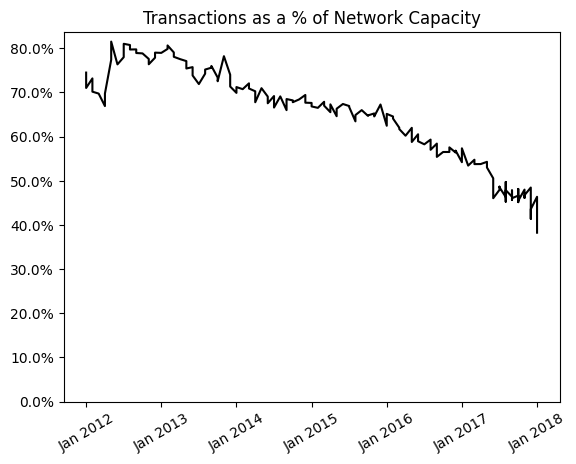

In [40]:
fig, ax = plt.subplots()
ax.plot(trans_fnl['display_date'],np.log1p(trans_fnl['transactions'].astype(float)/np.exp(trans_fnl['metcalfe_value'].astype(float)))*10,color='black')

x_ticks=plt.xticks(['Jan 2012','Jan 2013','Jan 2014','Jan 2015','Jan 2016','Jan 2017','Jan 2018'],rotation=30)
y_ticks=plt.yticks(np.arange(0, 90, 10))
ax.yaxis.set_major_formatter(lambda x, p: str(float(x))+'%')
plt.title('Transactions as a % of Network Capacity')